In [4]:
import matplotlib.pyplot as plt
import numpy as np

p=["b","p","s","e"]
dictc = {
    "b": "Belgium",
    "p": "Portugal",
    "s": "Spain",
    "e": "England"
}
lags={"b": 1, "p": 3, "s": 8,"e": 29}
hits=[[]]
hitsci1=[[]]
hitsci2=[[]]
logls = [[]]
for country in p:
    paths=[]
    for i in range(30):
        paths.append(country+"_"+str((i+1)*5)+".o")
    data=[[]]
    dataci1=[[]]
    dataci2=[[]]
    for x in paths:
        q=[]
        ci1=[]
        ci2=[]
        with open(x, 'r') as f:
            for line in f:
                if 'LogL: ' in line:
                    q.append(line[13:23])
                if 'p:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'R0_1' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'CV_1:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'lag_1:' in line:
                    q.append(lags[country])
        data.append(q)
        dataci1.append(ci1)
        dataci2.append(ci2)
    data.pop(0)
    dataci1.pop(0)
    dataci2.pop(0)

    logl=[]
    hit=[]
    hitci1=[]
    hitci2=[]
    for d in data:
        hit.append(1-(1/float(d[2]))**(1/(1+(float(d[3])**2))))
    for e in dataci1:
        hitci1.append(1-(1/float(e[1]))**(1/(1+(float(e[2])**2))))
    for f in dataci2:
        hitci2.append(1-(1/float(f[1]))**(1/(1+(float(f[2])**2))))
    hits.append(hit)
    hitsci1.append(hitci1)
    hitsci2.append(hitci2)
    tspan=[]
    for i in range(30):
        tspan.append((i+1)*5)
    for d in data:
        logl.append(float(d[0]))
    logls.append(logl)
    f = list(map(list, zip(*data)))
#     df = pd.DataFrame()
#     df["Num Days at Max Social Distancing"] = tspan
#     df["Log likelihood"] = f[0]
#     df["dmax"] = f[1]
#     df["R0"] = f[2]
#     df["CV"] = f[3]
#     df["lag"] = f[4]
#     df.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Parameters" + ".csv", index=False)
logls.pop(0)
hits.pop(0)
hitsci1.pop(0)
hitsci2.pop(0)
tspan=[]
for i in range(30):
    tspan.append((i+1)*5)
plt.figure(figsize=(12,7))
h1,=plt.plot(tspan,hits[0], label = "Belgium")
h2,=plt.plot(tspan,hits[1], label = "Portugal")
h3,=plt.plot(tspan,hits[2], label = "Spain")
h4,=plt.plot(tspan,hits[3], label = "England")
# plt.plot(tspan,hitsci1[0], color= "whitesmoke")
# plt.plot(tspan,hitsci1[1], color= "whitesmoke")
# plt.plot(tspan,hitsci1[2], color= "whitesmoke")
# plt.plot(tspan,hitsci1[3], color= "whitesmoke")
# plt.plot(tspan,hitsci2[0], color= "whitesmoke")
# plt.plot(tspan,hitsci2[1], color= "whitesmoke")
# plt.plot(tspan,hitsci2[2], color= "whitesmoke")
# plt.plot(tspan,hitsci2[3], color= "whitesmoke")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of days at max social distancing', fontsize=14)
plt.ylabel('HIT', fontsize=14)
plt.legend([h1,h2,h3,h4], ["Belgium","Portugal","Spain","England"], fontsize=12)
plt.title("HIT vs Number of days at max social distancing", fontsize = 16)
plt.show()

IndexError: list index out of range

In [2]:
a=5
b=11
c=19

print("Belgium")
print("30 days: ["+str(hitsci2[0][a])+", " + str(hits[0][a])+", " + str(hitsci1[0][a])+"]")
print("60 days: ["+str(hitsci2[0][b])+", " + str(hits[0][b])+", " + str(hitsci1[0][b])+"]")
print("100 days: ["+str(hitsci2[0][c])+", " + str(hits[0][c])+", " + str(hitsci1[0][c])+"]")
print("Portugal")
print("30 days: ["+str(hitsci2[1][a])+", " + str(hits[1][a])+", " + str(hitsci1[1][a])+"]")
print("60 days: ["+str(hitsci2[1][b])+", " + str(hits[1][b])+", " + str(hitsci1[1][b])+"]")
print("100 days: ["+str(hitsci2[1][c])+", " + str(hits[1][c])+", " + str(hitsci1[1][c])+"]")
print("Spain")
print("30 days")
print("30 days: ["+str(hitsci2[2][a])+", " + str(hits[2][a])+", " + str(hitsci1[2][a])+"]")
print("60 days: ["+str(hitsci2[2][b])+", " + str(hits[2][b])+", " + str(hitsci1[2][b])+"]")
print("100 days: ["+str(hitsci2[2][c])+", " + str(hits[2][c])+", " + str(hitsci1[2][c])+"]")
print("England")
print("30 days: ["+str(hitsci2[3][a])+", " + str(hits[3][a])+", " + str(hitsci1[3][a])+"]")
print("60 days: ["+str(hitsci2[3][b])+", " + str(hits[3][b])+", " + str(hitsci1[3][b])+"]")
print("100 days: ["+str(hitsci2[3][c])+", " + str(hits[3][c])+", " + str(hitsci1[3][c])+"]")

Belgium
30 days: [0.13965225025509187, 0.14081295688367923, 0.14196132990112498]
60 days: [0.16339944327032696, 0.1642239106796468, 0.16496256825379696]
100 days: [0.8177048647099844, 0.8223166981517297, 0.8242370515738582]
Portugal
30 days: [0.07202867374820887, 0.07301458452086351, 0.0740752217193813]
60 days: [0.23351474426477625, 0.24227144307870108, 0.25474127020304904]
100 days: [0.7630077749913549, 0.7616159031102452, 0.7583098343225486]
Spain
30 days
30 days: [0.11957872476708153, 0.12029734010037174, 0.12110209745150469]
60 days: [0.33586594469852027, 0.34646601810648225, 0.35801161718880126]
100 days: [0.7416863299254306, 0.7439448743096061, 0.7457541333628875]
England
30 days: [0.2163065066385269, 0.21708380079119904, 0.2177216852650432]
60 days: [0.2982505031061251, 0.299897906309337, 0.30182692475923056]
100 days: [0.672500118962482, 0.6768660630410976, 0.6761555465158637]


In [3]:
# import pandas as pd

# Bdat = pd.DataFrame()
# Bdat["Num Days Max SD"] = tspan
# Bdat["Min CI"] = hitsci2[0]
# Bdat["HIT Estimate"] = hits[0]
# Bdat["Max CI"] = hitsci1[0]
# Pdat = pd.DataFrame()
# Pdat["Num Days Max SD"] = tspan
# Pdat["Min CI"] = hitsci2[1]
# Pdat["HIT Estimate"] = hits[1]
# Pdat["Max CI"] = hitsci1[1]
# Sdat = pd.DataFrame()
# Sdat["Num Days Max SD"] = tspan
# Sdat["Min CI"] = hitsci2[2]
# Sdat["HIT Estimate"] = hits[2]
# Sdat["Max CI"] = hitsci1[2]
# Edat = pd.DataFrame()
# Edat["Num Days Max SD"] = tspan
# Edat["Min CI"] = hitsci2[3]
# Edat["HIT Estimate"] = hits[3]
# Edat["Max CI"] = hitsci1[3]

In [4]:
# Bdat.to_csv(r'C:\Users\pppot\Documents\projects\PEmaxSD\BelgiumHITs.csv', index=False)
# Pdat.to_csv(r'C:\Users\pppot\Documents\projects\PEmaxSD\PortugalHITs.csv', index=False)
# Sdat.to_csv(r'C:\Users\pppot\Documents\projects\PEmaxSD\SpainHITs.csv', index=False)
# Edat.to_csv(r'C:\Users\pppot\Documents\projects\PEmaxSD\EnglandHITs.csv', index=False)

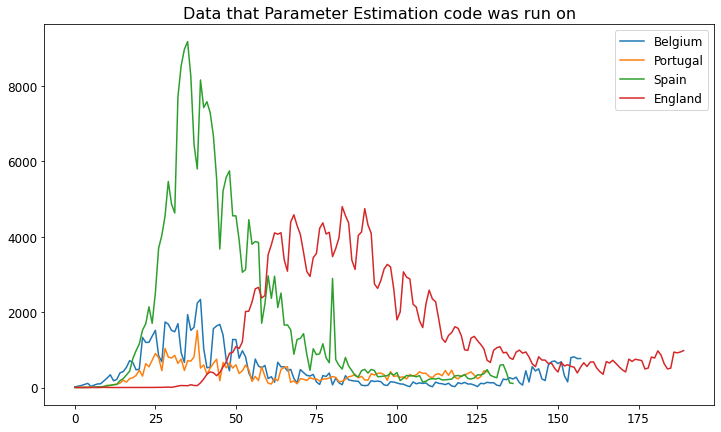

In [5]:
import pandas as pd
belgiumdata=pd.read_csv('Belgium_incidence.csv')
portugaldata=pd.read_csv('Portugal_incidence.csv')
spaindata=pd.read_csv('Spain_incidence.csv')
englanddata=pd.read_csv('England_incidence.csv')

bd = belgiumdata["Total"]
pd = portugaldata["Portugal"]
sd = spaindata["total"]
ed = englanddata["England"]
plt.figure(figsize=(12,7))
a1,=plt.plot(bd)
a2,=plt.plot(pd)
a3,=plt.plot(sd)
a4,=plt.plot(ed)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([a1,a2,a3,a4], ["Belgium", "Portugal", "Spain", "England"], fontsize=12)
plt.title("Data that Parameter Estimation code was run on", fontsize = 16)
plt.show()

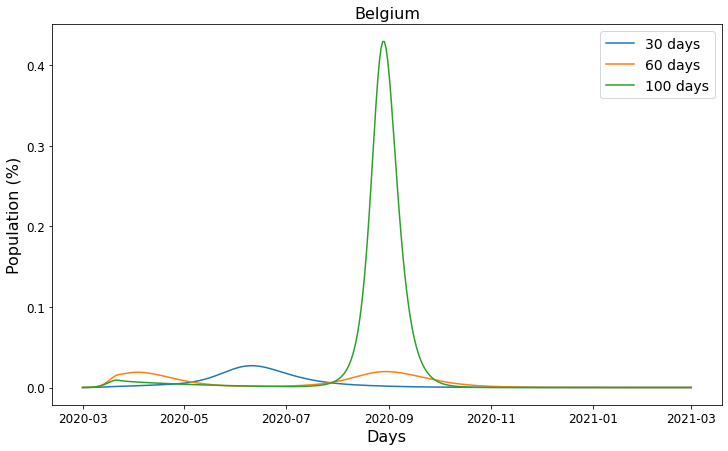

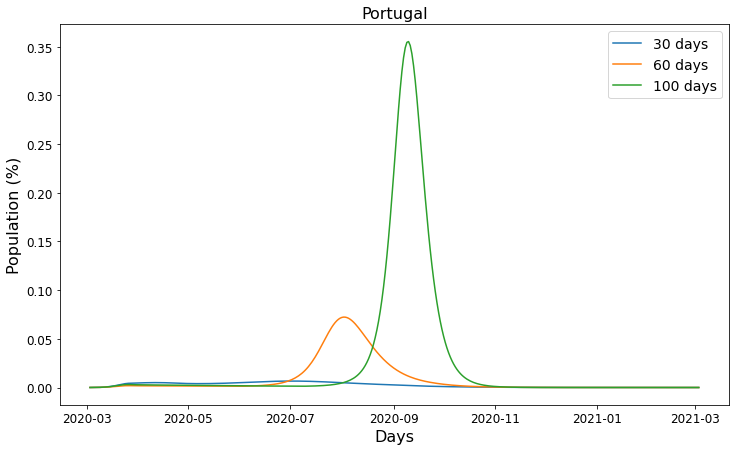

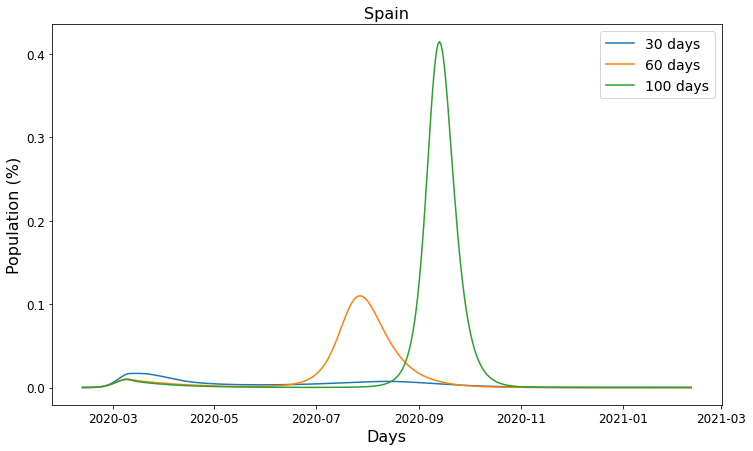

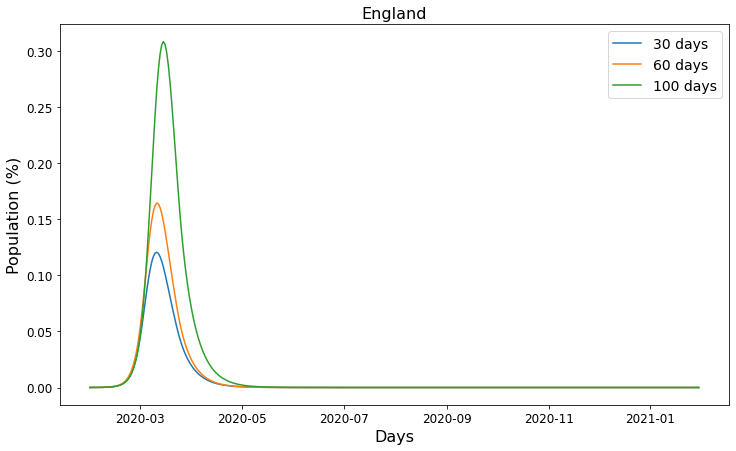

In [6]:
import numpy as np
dict = {
    "b": "Belgium",
    "p": "Portugal",
    "s": "Spain",
    "e": "England"
}
import pandas as pd
datespans = {
    p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
    p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
    p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
    p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
}
for country in p:
    d30 = np.genfromtxt(country+"_30.csv", delimiter = ',')
    d60 = np.genfromtxt(country+"_60.csv", delimiter = ',')
    d90 = np.genfromtxt(country+"_100.csv", delimiter = ',')
#     dat = pd.DataFrame()
#     dat["Date"] = datespans[country]
#     dat["30 days at max social distancing"] = d30
#     dat["60 days at max social distancing"] = d60
#     dat["100 days at max social distancing"] = d90
#     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Epidemic_Curve.csv", index=False)
    plt.figure(figsize=(12,7))
    d1,=plt.plot(datespans[country],d30)
    d2,=plt.plot(datespans[country],d60)
    d3,=plt.plot(datespans[country],d90)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Population (%)', fontsize=16)
    plt.legend([d1,d2,d3], ["30 days", "60 days", "100 days"], fontsize=14)
    plt.title(dict[country], fontsize = 16)
    plt.show()

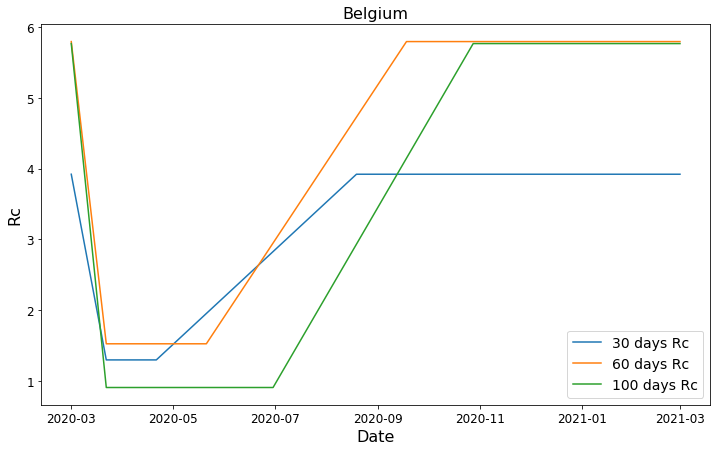

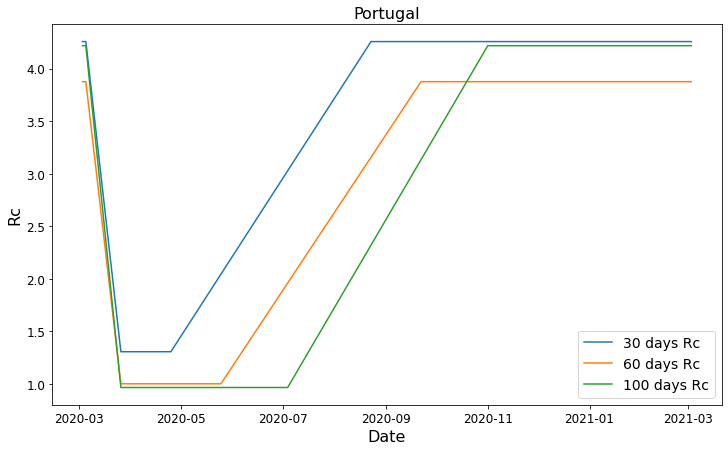

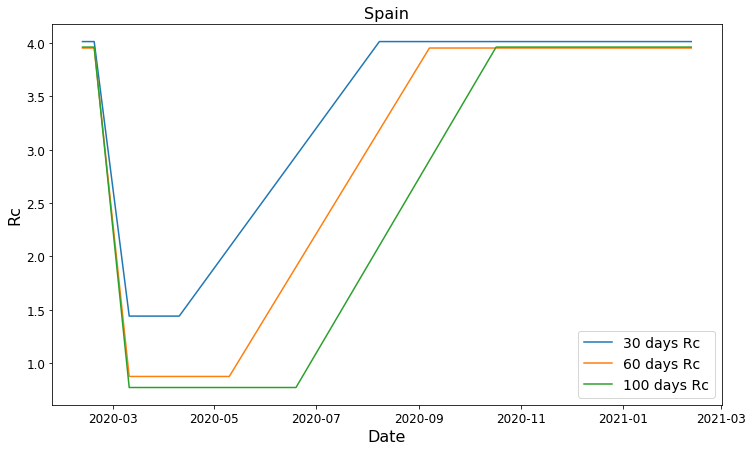

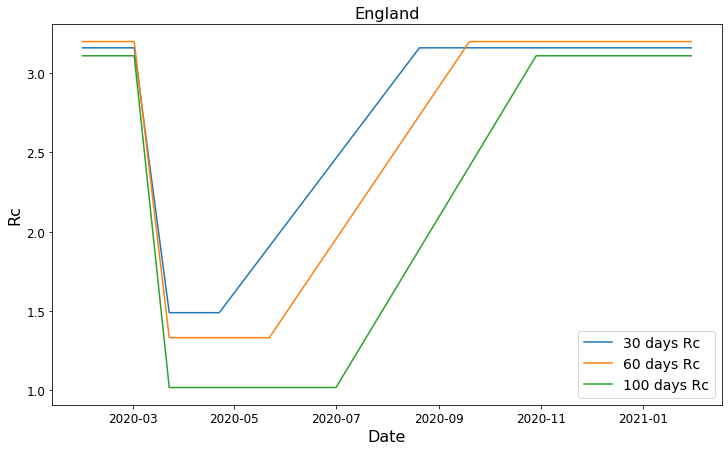

In [7]:
import pandas as pd
datespans = {
    p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
    p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
    p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
    p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
}

for country in p:
    d30Rc = np.genfromtxt(country+"_30_Rc.csv", delimiter = ',')
    d60Rc = np.genfromtxt(country+"_60_Rc.csv", delimiter = ',')
    d90Rc = np.genfromtxt(country+"_100_Rc.csv", delimiter = ',')
    plt.figure(figsize=(12,7))
    
#     dat = pd.DataFrame()
#     dat["Date"] = datespans[country]
#     dat["30 days at max social distancing"] = d30Rc
#     dat["60 days at max social distancing"] = d60Rc
#     dat["100 days at max social distancing"] = d90Rc
#     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Rc_Curve.csv", index=False)

    
    
    r1,=plt.plot(datespans[country],d30Rc)
    r2,=plt.plot(datespans[country],d60Rc)
    r3,=plt.plot(datespans[country],d90Rc)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Rc', fontsize=16)
    plt.legend([r1,r2,r3], ["30 days Rc", "60 days Rc", "100 days Rc"], fontsize=14)
    plt.title(dict[country], fontsize=16)
    plt.show()

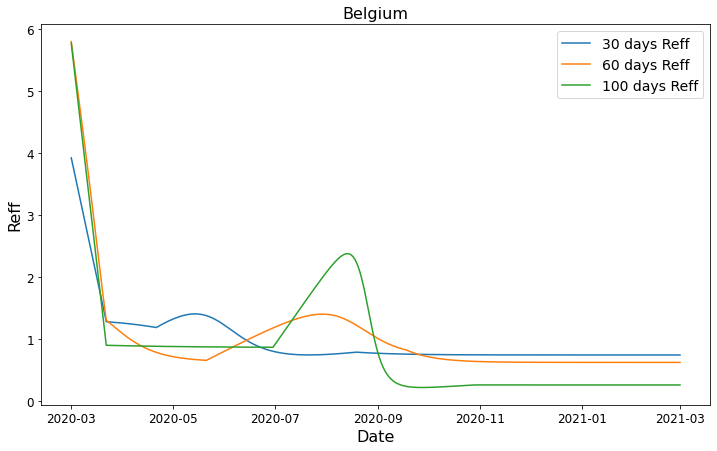

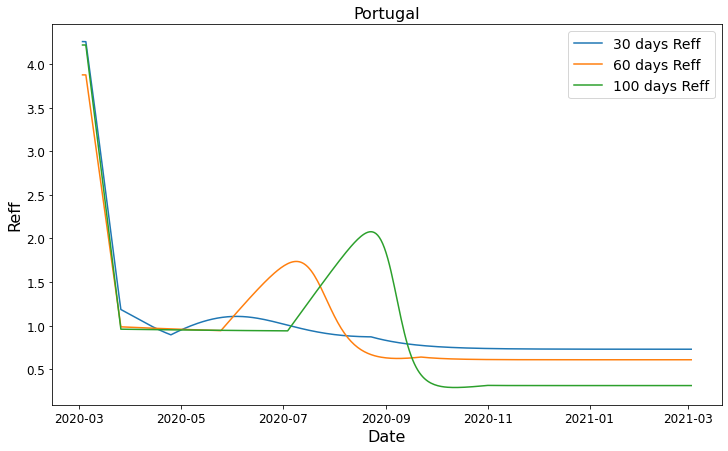

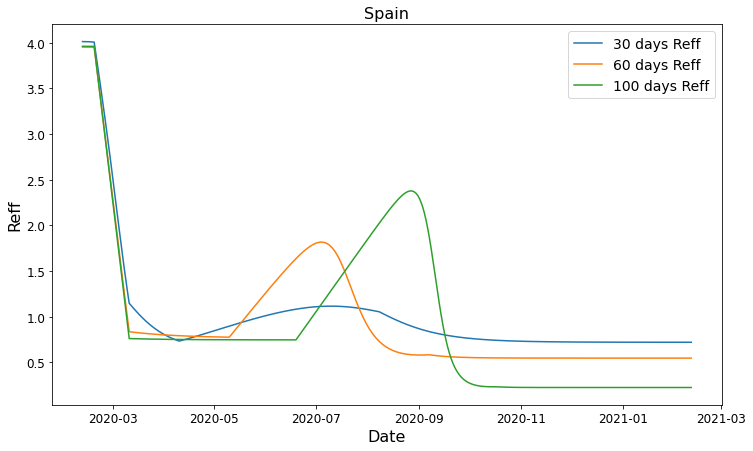

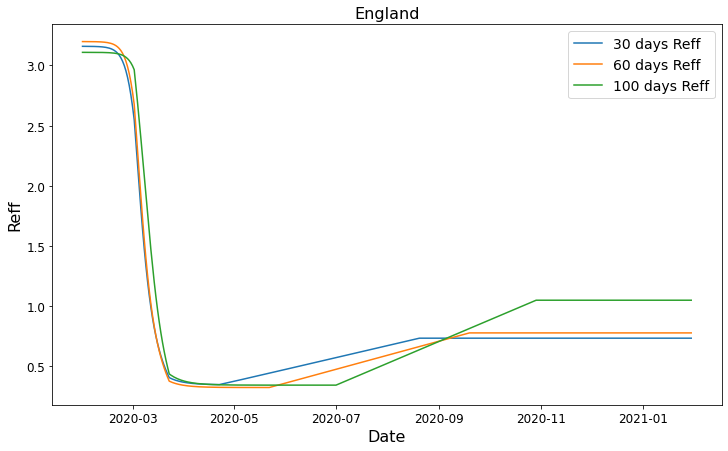

In [8]:
import pandas as pd
datespans = {
    p[0]: pd.date_range(start="2020-03-01",end="2021-03-01"),
    p[1]: pd.date_range(start="2020-03-03",end="2021-03-03"),
    p[2]: pd.date_range(start="2020-02-12",end="2021-02-11"),
    p[3]: pd.date_range(start="2020-01-31",end="2021-01-30")
}

for country in p:
    d30Reff = np.genfromtxt(country+"_30_Reff.csv", delimiter = ',')
    d60Reff = np.genfromtxt(country+"_60_Reff.csv", delimiter = ',')
    d90Reff = np.genfromtxt(country+"_100_Reff.csv", delimiter = ',')
    plt.figure(figsize=(12,7))

#     dat = pd.DataFrame()
#     dat["Date"] = datespans[country]
#     dat["30 days at max social distancing"] = d30Reff
#     dat["60 days at max social distancing"] = d60Reff
#     dat["100 days at max social distancing"] = d90Reff
#     dat.to_csv(r"C:\Users\pppot\Documents\projects\PEmaxSD\results\\"  + dictc[country] + "_Estimated_Reff_Curve.csv", index=False)


    r4,=plt.plot(datespans[country], d30Reff)
    r5,=plt.plot(datespans[country], d60Reff)
    r6,=plt.plot(datespans[country], d90Reff)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Reff', fontsize=16)
    plt.legend([r4,r5,r6], ["30 days Reff", "60 days Reff", "100 days Reff"], fontsize=14)
    plt.title(dict[country], fontsize=16)
    plt.show()